### Inicialização

In [1]:
import numpy as np
import pandas as pd

movies = pd.read_csv('./../data/tmdb_5000_movies.csv')
credits = pd.read_csv('./../data/tmdb_5000_credits.csv')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/pedro/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/pedro/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/pedro/.local/lib/python3.10/site-packag

AttributeError: _ARRAY_API not found

### Conhecendo os dados

In [2]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [3]:
movies.shape

(4803, 20)

In [4]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
credits.shape

(4803, 4)

### Transformando os dados

In [6]:
movies = movies.merge(credits, on='title')

In [7]:
movies.head(3)
# budget
# homepage
# id
# original_language
# original_title
# popularity
# production_comapny
# production_countries
# release-date

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [8]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [9]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [10]:
import ast

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [11]:
movies.dropna(inplace=True)

In [12]:
movies['genres'] = movies['genres'].apply(convert)
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [13]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [14]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [15]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [16]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [18]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [19]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [20]:
movies.sample(3)

,movie_id,title,overview,genres,keywords,cast,crew
747,82682,Gangster Squad,"Los Angeles, 1949. Ruthless, Brooklyn-born mob...","[Crime, Drama, Action, Thriller]","[los angeles, gangster]","[Josh Brolin, Ryan Gosling, Nick Nolte]",[Ruben Fleischer]
1068,9981,Kicking & Screaming,Phil Weston has been unathletic his entire lif...,"[Romance, Comedy, Family]","[father son relationship, generations confilct...","[Will Ferrell, Robert Duvall, Kate Walsh]",[Jesse Dylan]
1031,9095,Mary Reilly,A housemaid falls in love with Dr. Jekyll and ...,"[Drama, Horror, Thriller, Romance]","[servant, monster, laboratory, jekyll and hyde...","[Julia Roberts, John Malkovich, George Cole]",[Stephen Frears]


In [21]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [22]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [23]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]


In [24]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [25]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [27]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [28]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


### Vetorização e Normalização

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Função para combinar as características relevantes de cada filme em uma única string
def combine_features(row):
    return f"{row['genres']} {row['keywords']} {row['cast']} {row['crew']} {row['overview']}"

# Supondo que o DataFrame 'movies' já esteja carregado com os dados dos filmes
movies['combined_features'] = movies.apply(combine_features, axis=1)

# Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(movies['combined_features'])

In [30]:
tfidf_matrix.shape[1]

35551

In [31]:
# Normalização dos Dados (StandardScaler)
scaler = StandardScaler(with_mean=False)  # Evitar erro com matriz esparsa
tfidf_normalized = scaler.fit_transform(tfidf_matrix)

# Redução de Dimensionalidade com PCA
n_components = 4000  # Ajuste para o número de dimensões desejadas
pca = PCA(n_components=n_components)
tfidf_reduced = pca.fit_transform(tfidf_normalized)

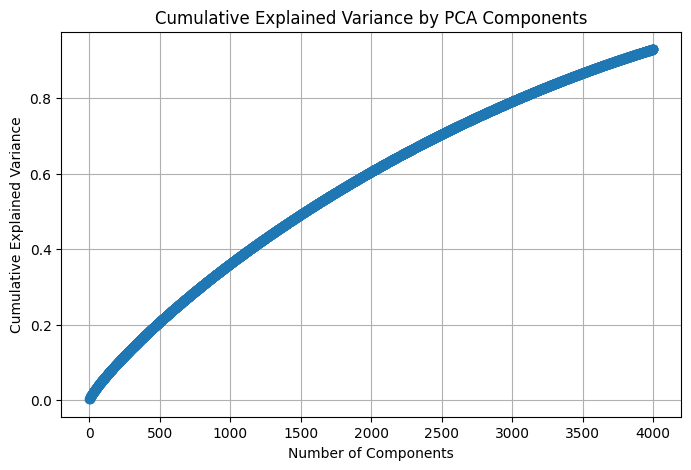

Número ideal de componentes para 93% da variância: 3997


In [32]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotar a variância explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, 4000 + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Encontrar o número de componentes que explicam pelo menos 93% da variância
n_components_93 = next(i for i, v in enumerate(cumulative_variance) if v >= 0.93) + 1
print(f"Número ideal de componentes para 93% da variância: {n_components_93}")

In [33]:
tfidf_normalized.shape

(4806, 35551)

In [34]:
pca = PCA(n_components=n_components_93)
tfidf_reduced = pca.fit_transform(tfidf_normalized)

In [35]:
print(f'Variância explicada pelos dados: {pca.explained_variance_ratio_.sum() * 100}%')

Variância explicada pelos dados: 93.00561966261382%


In [36]:
from sklearn.cluster import MiniBatchKMeans
from k_means_constrained import KMeansConstrained
from sklearn.metrics import silhouette_score

# Converta a matriz TF-IDF para um array denso, se necessário
tfidf_matrix_dense = tfidf_matrix.toarray()

# Função para encontrar o melhor número de clusters
def find_best_kmeans(tfidf_matrix_dense, cluster_range, size_min=50):
    best_k = None
    best_silhouette = -1  # Silhueta vai de -1 a 1, então iniciamos no pior caso
    best_kmeans_model = None
    results = []

    for n_clusters in cluster_range:
        # Etapa 1: MiniBatch KMeans para inicialização rápida
        mini_batch_kmeans = MiniBatchKMeans(
            n_clusters=n_clusters,
            batch_size=256,
            random_state=42
        )
        mini_batch_kmeans.fit(tfidf_matrix_dense)
        
        # Etapa 2: KMeansConstrained usando os centros do MiniBatch
        kmeans = KMeansConstrained(
            n_clusters=n_clusters,
            size_min=size_min,
            init=mini_batch_kmeans.cluster_centers_,  # Inicialização dos centros
            random_state=42
        )
        kmeans.fit(tfidf_matrix_dense)
        
        # Calcular métricas: Inertia e Silhouette
        inertia = kmeans.inertia_
        silhouette = silhouette_score(tfidf_matrix_dense, kmeans.labels_)
        
        print(f'# of clusters: {n_clusters} | Inertia: {inertia:.4f} | Silhouette: {silhouette:.4f}')
        
        # Armazena os resultados para análise posterior
        results.append((n_clusters, inertia, silhouette))
        
        # Atualiza o melhor modelo baseado na silhueta
        if silhouette > best_silhouette:
            best_k = n_clusters
            best_silhouette = silhouette
            best_kmeans_model = kmeans
    
    return best_k, best_silhouette, best_kmeans_model, results

# Variar o número de clusters entre 30 e 90
cluster_range = range(20, 91)
best_k, best_silhouette, best_kmeans_model, results = find_best_kmeans(tfidf_matrix_dense, cluster_range)

print(f"Melhor número de clusters: {best_k}")
print(f"Melhor índice de Silhouette: {best_silhouette:.4f}")

/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 20 | Inertia: 4709.0429 | Silhouette: 0.0003


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 21 | Inertia: 4707.3180 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 22 | Inertia: 4714.6287 | Silhouette: -0.0003


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 23 | Inertia: 4706.0322 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 24 | Inertia: 4703.5426 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 25 | Inertia: 4696.5616 | Silhouette: 0.0011


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 26 | Inertia: 4699.6292 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 27 | Inertia: 4693.5054 | Silhouette: 0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 28 | Inertia: 4700.9907 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 29 | Inertia: 4694.8266 | Silhouette: 0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 30 | Inertia: 4685.1901 | Silhouette: 0.0007


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 31 | Inertia: 4693.5741 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 32 | Inertia: 4692.8070 | Silhouette: 0.0004


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 33 | Inertia: 4691.6325 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 34 | Inertia: 4692.5812 | Silhouette: -0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 35 | Inertia: 4684.5561 | Silhouette: 0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 36 | Inertia: 4682.6861 | Silhouette: 0.0003


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 37 | Inertia: 4681.8278 | Silhouette: -0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 38 | Inertia: 4675.8821 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 39 | Inertia: 4677.7255 | Silhouette: -0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 40 | Inertia: 4676.0060 | Silhouette: 0.0006


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 41 | Inertia: 4681.1230 | Silhouette: 0.0000


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 42 | Inertia: 4681.6609 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 43 | Inertia: 4674.9803 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 44 | Inertia: 4673.9973 | Silhouette: 0.0004


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 45 | Inertia: 4674.9782 | Silhouette: -0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 46 | Inertia: 4671.2128 | Silhouette: 0.0000


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 47 | Inertia: 4673.0185 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 48 | Inertia: 4668.9728 | Silhouette: 0.0003


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 49 | Inertia: 4667.4166 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 50 | Inertia: 4667.0900 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 51 | Inertia: 4655.2614 | Silhouette: 0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 52 | Inertia: 4662.9760 | Silhouette: -0.0004


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 53 | Inertia: 4665.2395 | Silhouette: -0.0004


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 54 | Inertia: 4658.7855 | Silhouette: -0.0000


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 55 | Inertia: 4662.1520 | Silhouette: -0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 56 | Inertia: 4654.6914 | Silhouette: 0.0003


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 57 | Inertia: 4661.9205 | Silhouette: -0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 58 | Inertia: 4659.4476 | Silhouette: -0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 59 | Inertia: 4658.4675 | Silhouette: -0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 60 | Inertia: 4654.5664 | Silhouette: -0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 61 | Inertia: 4651.8489 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 62 | Inertia: 4650.9521 | Silhouette: -0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 63 | Inertia: 4648.6405 | Silhouette: -0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 64 | Inertia: 4648.3365 | Silhouette: -0.0000


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 65 | Inertia: 4652.6707 | Silhouette: -0.0004


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 66 | Inertia: 4648.1122 | Silhouette: -0.0004


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 67 | Inertia: 4643.1002 | Silhouette: -0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 68 | Inertia: 4645.5228 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 69 | Inertia: 4650.3219 | Silhouette: -0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 70 | Inertia: 4646.2234 | Silhouette: -0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 71 | Inertia: 4652.7204 | Silhouette: -0.0008


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 72 | Inertia: 4641.3065 | Silhouette: -0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 73 | Inertia: 4640.9266 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 74 | Inertia: 4645.1408 | Silhouette: -0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 75 | Inertia: 4637.9992 | Silhouette: -0.0006


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 76 | Inertia: 4638.7232 | Silhouette: -0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 77 | Inertia: 4639.7699 | Silhouette: -0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 78 | Inertia: 4637.0548 | Silhouette: -0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 79 | Inertia: 4636.4215 | Silhouette: -0.0000


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 80 | Inertia: 4634.8847 | Silhouette: -0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 81 | Inertia: 4629.3857 | Silhouette: 0.0000


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 82 | Inertia: 4628.3281 | Silhouette: 0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 83 | Inertia: 4631.8285 | Silhouette: 0.0001


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 84 | Inertia: 4630.0700 | Silhouette: -0.0003


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 85 | Inertia: 4629.9522 | Silhouette: -0.0004


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 86 | Inertia: 4629.5419 | Silhouette: -0.0005


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 87 | Inertia: 4623.0877 | Silhouette: 0.0000


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 88 | Inertia: 4626.0863 | Silhouette: -0.0002


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 89 | Inertia: 4621.3604 | Silhouette: 0.0000


/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


# of clusters: 90 | Inertia: 4622.8775 | Silhouette: -0.0002
Melhor número de clusters: 25
Melhor índice de Silhouette: 0.0011


## Testando alguns bons

### 25 clusters

**Inertia:** 4696.5616

**Silhouette:** 0.0011

In [37]:
n_clusters = 25

mini_batch_kmeans_25 = MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=256,
    random_state=42
)

mini_batch_kmeans_25.fit(tfidf_matrix_dense)

# Etapa 2: KMeansConstrained usando os centros do MiniBatch
kmeans_25 = KMeansConstrained(
    n_clusters=n_clusters,
    size_min=50,
    init=mini_batch_kmeans_25.cluster_centers_,  # Inicialização dos centros
    random_state=42
)

kmeans_25.fit(tfidf_matrix_dense)

/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


KMeansConstrained(copy_x=True,
         init=array([[0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.],
       ...,
       [0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.]], shape=(25, 35551)),
         max_iter=300, n_clusters=25, n_init=10, n_jobs=1, random_state=42,
         size_max=None, size_min=50, tol=0.0001, verbose=False)

In [78]:
movies['cluster'] = kmeans_25.labels_

In [39]:
movies['cluster'].value_counts()

cluster
11    2090
16     692
9      499
14     152
3      133
19     123
6       84
10      77
8       77
24      71
23      65
22      63
20      61
2       57
21      54
15      53
4       53
13      52
1       50
7       50
5       50
18      50
12      50
17      50
0       50
Name: count, dtype: int64

In [40]:
# Função para recomendar filmes semelhantes
def recommend_similar_movies(movie_title, num_recommendations=5):
    if movie_title not in movies['title'].values:
        return "Filme não encontrado."
    
    movie_cluster = movies[movies['title'] == movie_title]['cluster'].values[0]
    similar_movies = movies[movies['cluster'] == movie_cluster]
    similar_movies = similar_movies[similar_movies['title'] != movie_title]
    
    return similar_movies[['title', 'genres']].head(num_recommendations)

In [65]:
print(recommend_similar_movies('Spider-Man', 25))

                                   title  \
3                  The Dark Knight Rises   
5                           Spider-Man 3   
7                Avengers: Age of Ultron   
9     Batman v Superman: Dawn of Justice   
10                      Superman Returns   
14                          Man of Steel   
16                          The Avengers   
20                The Amazing Spider-Man   
26            Captain America: Civil War   
30                          Spider-Man 2   
31                            Iron Man 3   
33                 X-Men: The Last Stand   
38              The Amazing Spider-Man 2   
41                         Green Lantern   
46            X-Men: Days of Future Past   
64                     X-Men: Apocalypse   
65                       The Dark Knight   
68                              Iron Man   
72                         Suicide Squad   
79                            Iron Man 2   
85   Captain America: The Winter Soldier   
94               Guardians of th

In [79]:
print(recommend_similar_movies('Harry Potter and the Half-Blood Prince', 45))

                                                  title  \
141                                     Mars Needs Moms   
243                                 Night at the Museum   
265                                  The Cat in the Hat   
293                           Where the Wild Things Are   
436                                         Grown Ups 2   
501                                   The Little Prince   
560                                              Driven   
639                                       Step Brothers   
842                                          Paddington   
881                                             Beloved   
896                                            Barnyard   
1038                                          Liar Liar   
1072                                            Blended   
1175                                       Ride Along 2   
1293                                  Because I Said So   
1544                                              Speed 

### 30 clusters

**Inertia:** 4685.1901

**Silhouette:** 0.0007

In [42]:
n_clusters = 30

mini_batch_kmeans_30 = MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=256,
    random_state=42
)

mini_batch_kmeans_30.fit(tfidf_matrix_dense)

# Etapa 2: KMeansConstrained usando os centros do MiniBatch
kmeans_30 = KMeansConstrained(
    n_clusters=n_clusters,
    size_min=50,
    init=mini_batch_kmeans_30.cluster_centers_,  # Inicialização dos centros
    random_state=42
)

kmeans_30.fit(tfidf_matrix_dense)

/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


KMeansConstrained(copy_x=True,
         init=array([[0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.],
       ...,
       [0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.]], shape=(30, 35551)),
         max_iter=300, n_clusters=30, n_init=10, n_jobs=1, random_state=42,
         size_max=None, size_min=50, tol=0.0001, verbose=False)

In [43]:
movies['cluster'] = kmeans_30.labels_

In [44]:
movies['cluster'].value_counts()

cluster
10    2237
1      430
9      201
8      146
24     144
29     137
17     127
20     120
6       90
7       80
27      77
28      65
23      62
25      60
2       55
19      55
22      54
21      54
16      53
11      52
15      52
4       52
5       51
12      51
3       51
0       50
26      50
13      50
18      50
14      50
Name: count, dtype: int64

In [45]:
print(recommend_similar_movies('Spider-Man', 15))

                                                 title  \
5                                         Spider-Man 3   
8               Harry Potter and the Half-Blood Prince   
15            The Chronicles of Narnia: Prince Caspian   
30                                        Spider-Man 2   
37                          Oz: The Great and Powerful   
63   The Chronicles of Narnia: The Lion, the Witch ...   
109  The Chronicles of Narnia: The Voyage of the Da...   
113          Harry Potter and the Order of the Phoenix   
114                Harry Potter and the Goblet of Fire   
146                 Madagascar 3: Europe's Most Wanted   
191           Harry Potter and the Prisoner of Azkaban   
195            Night at the Museum: Secret of the Tomb   
197           Harry Potter and the Philosopher's Stone   
233          Star Wars: Episode I - The Phantom Menace   
237                         The Huntsman: Winter's War   

                                    genres  
5             [Fantasy, Ac

Pelo resultado acima, não foi muito bom, já que relacionou MUITO Spider-Man com Harry Potter

### 40 clusters

**Inertia:** 4676.0060

**Silhouette:** 0.0006

In [46]:
n_clusters = 40

mini_batch_kmeans_40 = MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=256,
    random_state=42
)

mini_batch_kmeans_40.fit(tfidf_matrix_dense)

# Etapa 2: KMeansConstrained usando os centros do MiniBatch
kmeans_40= KMeansConstrained(
    n_clusters=n_clusters,
    size_min=50,
    init=mini_batch_kmeans_40.cluster_centers_,  # Inicialização dos centros
    random_state=42
)

kmeans_40.fit(tfidf_matrix_dense)

/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


KMeansConstrained(copy_x=True,
         init=array([[0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.],
       ...,
       [0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.]], shape=(40, 35551)),
         max_iter=300, n_clusters=40, n_init=10, n_jobs=1, random_state=42,
         size_max=None, size_min=50, tol=0.0001, verbose=False)

In [74]:
movies['cluster'] = kmeans_40.labels_

In [67]:
movies['cluster'].value_counts()

cluster
22    1825
36     646
24     126
32     120
25     119
9      114
38     112
35      71
14      70
21      68
27      65
0       58
3       55
33      53
15      52
11      51
6       51
8       50
37      50
10      50
26      50
12      50
16      50
7       50
4       50
13      50
31      50
1       50
18      50
29      50
5       50
39      50
19      50
28      50
30      50
20      50
34      50
2       50
17      50
23      50
Name: count, dtype: int64

In [68]:
print(recommend_similar_movies('Spider-Man', 25))

                                   title  \
3                  The Dark Knight Rises   
5                           Spider-Man 3   
7                Avengers: Age of Ultron   
9     Batman v Superman: Dawn of Justice   
10                      Superman Returns   
14                          Man of Steel   
16                          The Avengers   
20                The Amazing Spider-Man   
26            Captain America: Civil War   
30                          Spider-Man 2   
31                            Iron Man 3   
33                 X-Men: The Last Stand   
38              The Amazing Spider-Man 2   
41                         Green Lantern   
46            X-Men: Days of Future Past   
64                     X-Men: Apocalypse   
65                       The Dark Knight   
68                              Iron Man   
72                         Suicide Squad   
79                            Iron Man 2   
85   Captain America: The Winter Soldier   
94               Guardians of th

In [77]:
print(recommend_similar_movies('Harry Potter and the Half-Blood Prince', 45))

                                                 title  \
6                                              Tangled   
15            The Chronicles of Narnia: Prince Caspian   
37                          Oz: The Great and Powerful   
42                                         Toy Story 3   
54                                   The Good Dinosaur   
63   The Chronicles of Narnia: The Lion, the Witch ...   
66                                                  Up   
78                                     The Jungle Book   
90                                   The Polar Express   
103                          The Sorcerer's Apprentice   
113          Harry Potter and the Order of the Phoenix   
117                  Charlie and the Chocolate Factory   
124                                             Frozen   
130                                               Bolt   
142                                       Flushed Away   
143                                                Pan   
173           

Resultado bom, mostrando todos filmes do Spider-Man e relacionando com outros filmes de super-herói

### 51 clusters

**Inertia:** 4655.2614

**Silhouette:** 0.0005

In [50]:
n_clusters = 51

mini_batch_kmeans_51 = MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=256,
    random_state=42
)

mini_batch_kmeans_51.fit(tfidf_matrix_dense)

# Etapa 2: KMeansConstrained usando os centros do MiniBatch
kmeans_51= KMeansConstrained(
    n_clusters=n_clusters,
    size_min=50,
    init=mini_batch_kmeans_51.cluster_centers_,  # Inicialização dos centros
    random_state=42
)

kmeans_51.fit(tfidf_matrix_dense)

/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


KMeansConstrained(copy_x=True,
         init=array([[0.1915 , 0.     , ..., 0.     , 0.     ],
       [0.     , 0.     , ..., 0.     , 0.     ],
       ...,
       [0.     , 0.     , ..., 0.     , 0.     ],
       [0.     , 0.14771, ..., 0.     , 0.     ]], shape=(51, 35551)),
         max_iter=300, n_clusters=51, n_init=10, n_jobs=1, random_state=42,
         size_max=None, size_min=50, tol=0.0001, verbose=False)

In [80]:
movies['cluster'] = kmeans_51.labels_

In [52]:
movies['cluster'].value_counts()

cluster
36    1896
15     144
22     127
31      85
6       76
9       72
21      71
10      71
28      70
11      68
20      66
30      62
40      61
45      58
44      58
41      58
46      57
24      52
3       51
14      51
49      51
43      51
5       50
38      50
50      50
12      50
17      50
25      50
13      50
0       50
16      50
18      50
2       50
23      50
42      50
7       50
8       50
47      50
35      50
19      50
48      50
33      50
4       50
37      50
26      50
39      50
32      50
29      50
34      50
1       50
27      50
Name: count, dtype: int64

In [53]:
print(recommend_similar_movies('Spider-Man', 15))

                                   title  \
7                Avengers: Age of Ultron   
16                          The Avengers   
26            Captain America: Civil War   
31                            Iron Man 3   
33                 X-Men: The Last Stand   
46            X-Men: Days of Future Past   
64                     X-Men: Apocalypse   
68                              Iron Man   
70                        Wild Wild West   
76           G.I. Joe: The Rise of Cobra   
79                            Iron Man 2   
85   Captain America: The Winter Soldier   
94               Guardians of the Galaxy   
101                   X-Men: First Class   
107                             Warcraft   

                                                genres  
7                  [Action, Adventure, ScienceFiction]  
16                 [ScienceFiction, Action, Adventure]  
26                 [Adventure, Action, ScienceFiction]  
31                 [Action, Adventure, ScienceFiction]  
33       [

In [81]:
print(recommend_similar_movies('Harry Potter and the Half-Blood Prince', 45))

                                                 title  \
6                                              Tangled   
15            The Chronicles of Narnia: Prince Caspian   
37                          Oz: The Great and Powerful   
48                               Jack the Giant Slayer   
50                 Prince of Persia: The Sands of Time   
55                                               Brave   
63   The Chronicles of Narnia: The Lion, the Witch ...   
80                         Snow White and the Huntsman   
81                                          Maleficent   
86                                 Shrek Forever After   
103                          The Sorcerer's Apprentice   
106                                    Shrek the Third   
109  The Chronicles of Narnia: The Voyage of the Da...   
113          Harry Potter and the Order of the Phoenix   
114                Harry Potter and the Goblet of Fire   
124                                             Frozen   
130           

In [82]:
# Captain America: The Winter Soldier
print(recommend_similar_movies('Captain America: The Winter Soldier', 45))

                                                  title  \
7                               Avengers: Age of Ultron   
16                                         The Avengers   
26                           Captain America: Civil War   
31                                           Iron Man 3   
33                                X-Men: The Last Stand   
46                           X-Men: Days of Future Past   
64                                    X-Men: Apocalypse   
68                                             Iron Man   
70                                       Wild Wild West   
76                          G.I. Joe: The Rise of Cobra   
79                                           Iron Man 2   
94                              Guardians of the Galaxy   
101                                  X-Men: First Class   
107                                            Warcraft   
115                                             Hancock   
122                            X-Men Origins: Wolverine 

In [83]:
# X-Men: The Last Stand
print(recommend_similar_movies('X-Men: The Last Stand', 45))

                                                  title  \
7                               Avengers: Age of Ultron   
16                                         The Avengers   
26                           Captain America: Civil War   
31                                           Iron Man 3   
46                           X-Men: Days of Future Past   
64                                    X-Men: Apocalypse   
68                                             Iron Man   
70                                       Wild Wild West   
76                          G.I. Joe: The Rise of Cobra   
79                                           Iron Man 2   
85                  Captain America: The Winter Soldier   
94                              Guardians of the Galaxy   
101                                  X-Men: First Class   
107                                            Warcraft   
115                                             Hancock   
122                            X-Men Origins: Wolverine 

BOM (ESCOLHIDO)

### 56 clusters

**Inertia:** 4654.6914

**Silhouette:** 0.0003

In [54]:
n_clusters = 56

mini_batch_kmeans_56 = MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=256,
    random_state=42
)

mini_batch_kmeans_56.fit(tfidf_matrix_dense)

# Etapa 2: KMeansConstrained usando os centros do MiniBatch
kmeans_56= KMeansConstrained(
    n_clusters=n_clusters,
    size_min=50,
    init=mini_batch_kmeans_56.cluster_centers_,  # Inicialização dos centros
    random_state=42
)

kmeans_56.fit(tfidf_matrix_dense)

/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


KMeansConstrained(copy_x=True,
         init=array([[0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.],
       ...,
       [0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.]], shape=(56, 35551)),
         max_iter=300, n_clusters=56, n_init=10, n_jobs=1, random_state=42,
         size_max=None, size_min=50, tol=0.0001, verbose=False)

In [72]:
movies['cluster'] = kmeans_56.labels_

In [56]:
movies['cluster'].value_counts()

cluster
16    1711
23     239
12      79
7       75
30      74
13      65
31      63
52      59
44      59
49      59
28      55
46      54
48      53
47      53
8       52
40      52
4       51
6       51
53      51
27      51
35      50
9       50
17      50
43      50
21      50
1       50
29      50
2       50
3       50
37      50
32      50
41      50
0       50
11      50
45      50
38      50
51      50
5       50
55      50
26      50
39      50
14      50
18      50
50      50
25      50
24      50
36      50
20      50
22      50
42      50
10      50
19      50
54      50
34      50
15      50
33      50
Name: count, dtype: int64

In [57]:
print(recommend_similar_movies('Spider-Man', 15))

                                         title  \
5                                 Spider-Man 3   
8       Harry Potter and the Half-Blood Prince   
15    The Chronicles of Narnia: Prince Caspian   
20                      The Amazing Spider-Man   
30                                Spider-Man 2   
38                    The Amazing Spider-Man 2   
94                     Guardians of the Galaxy   
113  Harry Potter and the Order of the Phoenix   
114        Harry Potter and the Goblet of Fire   
143                                        Pan   
191   Harry Potter and the Prisoner of Azkaban   
197   Harry Potter and the Philosopher's Stone   
198                                   R.I.P.D.   
276    Harry Potter and the Chamber of Secrets   
397                           It's Complicated   

                                    genres  
5             [Fantasy, Action, Adventure]  
8             [Adventure, Fantasy, Family]  
15            [Adventure, Family, Fantasy]  
20            [Acti

Relacionou MUITO Spider-Man com Harry Potter

In [73]:
# Harry Potter and the Half-Blood Prince

print(recommend_similar_movies('Harry Potter and the Half-Blood Prince', 15))

                                         title  \
5                                 Spider-Man 3   
15    The Chronicles of Narnia: Prince Caspian   
20                      The Amazing Spider-Man   
30                                Spider-Man 2   
38                    The Amazing Spider-Man 2   
94                     Guardians of the Galaxy   
113  Harry Potter and the Order of the Phoenix   
114        Harry Potter and the Goblet of Fire   
143                                        Pan   
159                                 Spider-Man   
191   Harry Potter and the Prisoner of Azkaban   
197   Harry Potter and the Philosopher's Stone   
198                                   R.I.P.D.   
276    Harry Potter and the Chamber of Secrets   
397                           It's Complicated   

                                    genres  
5             [Fantasy, Action, Adventure]  
15            [Adventure, Family, Fantasy]  
20            [Action, Adventure, Fantasy]  
30            [Acti

### 73 clusters

**Inertia:** 4640.9266

**Silhouette:** 0.0001

In [58]:
n_clusters = 73

mini_batch_kmeans_73 = MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=256,
    random_state=42
)

mini_batch_kmeans_73.fit(tfidf_matrix_dense)

# Etapa 2: KMeansConstrained usando os centros do MiniBatch
kmeans_73= KMeansConstrained(
    n_clusters=n_clusters,
    size_min=50,
    init=mini_batch_kmeans_73.cluster_centers_,  # Inicialização dos centros
    random_state=42
)

kmeans_73.fit(tfidf_matrix_dense)

/home/pedro/.local/lib/python3.10/site-packages/k_means_constrained/k_means_constrained_.py:643: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


KMeansConstrained(copy_x=True,
         init=array([[0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.],
       ...,
       [0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.]], shape=(73, 35551)),
         max_iter=300, n_clusters=73, n_init=10, n_jobs=1, random_state=42,
         size_max=None, size_min=50, tol=0.0001, verbose=False)

In [69]:
movies['cluster'] = kmeans_73.labels_

In [60]:
movies['cluster'].value_counts()

cluster
4     1130
35      73
63      65
55      56
16      56
      ... 
48      50
28      50
70      50
18      50
3       50
Name: count, Length: 73, dtype: int64

In [70]:
print(recommend_similar_movies('Spider-Man', 25))

                                   title  \
5                           Spider-Man 3   
7                Avengers: Age of Ultron   
9     Batman v Superman: Dawn of Justice   
10                      Superman Returns   
14                          Man of Steel   
16                          The Avengers   
26            Captain America: Civil War   
30                          Spider-Man 2   
31                            Iron Man 3   
33                 X-Men: The Last Stand   
46            X-Men: Days of Future Past   
64                     X-Men: Apocalypse   
65                       The Dark Knight   
68                              Iron Man   
79                            Iron Man 2   
85   Captain America: The Winter Soldier   
101                   X-Men: First Class   
115                              Hancock   
119                        Batman Begins   
122             X-Men Origins: Wolverine   
126                 Thor: The Dark World   
129                             

Poucos filmes do Spider-Man

#### Pesquisa de filmes com determinado nome

In [63]:
spiderman_movies = movies[movies['title'].str.contains("Spider-Man", case=False, na=False)]

# Exibir os filmes filtrados
print(spiderman_movies)

     movie_id                     title  \
5         559              Spider-Man 3   
20       1930    The Amazing Spider-Man   
30        558              Spider-Man 2   
38     102382  The Amazing Spider-Man 2   
159       557                Spider-Man   

                                              overview  \
5    [The, seemingly, invincible, Spider-Man, goes,...   
20   [Peter, Parker, is, an, outcast, high, schoole...   
30   [Peter, Parker, is, going, through, a, major, ...   
38   [For, Peter, Parker,, life, is, busy., Between...   
159  [After, being, bitten, by, a, genetically, alt...   

                           genres  \
5    [Fantasy, Action, Adventure]   
20   [Action, Adventure, Fantasy]   
30   [Action, Adventure, Fantasy]   
38   [Action, Adventure, Fantasy]   
159             [Fantasy, Action]   

                                              keywords  \
5    [dualidentity, amnesia, sandstorm, loveofone's...   
20   [lossoffather, vigilante, serum, marvelcomic, ..

In [71]:
spiderman_movies = movies[movies['title'].str.contains("Harry Potter", case=False, na=False)]

# Exibir os filmes filtrados
print(spiderman_movies)

     movie_id                                      title  \
8         767     Harry Potter and the Half-Blood Prince   
113       675  Harry Potter and the Order of the Phoenix   
114       674        Harry Potter and the Goblet of Fire   
191       673   Harry Potter and the Prisoner of Azkaban   
197       671   Harry Potter and the Philosopher's Stone   
276       672    Harry Potter and the Chamber of Secrets   

                                              overview  \
8    [As, Harry, begins, his, sixth, year, at, Hogw...   
113  [Returning, for, his, fifth, year, of, study, ...   
114  [Harry, starts, his, fourth, year, at, Hogwart...   
191  [Harry,, Ron, and, Hermione, return, to, Hogwa...   
197  [Harry, Potter, has, lived, under, the, stairs...   
276  [Ignoring, threats, to, his, life,, Harry, ret...   

                                    genres  \
8             [Adventure, Fantasy, Family]   
113  [Adventure, Fantasy, Family, Mystery]   
114           [Adventure, Fantasy,

### Escolhido 51 clusters

Salvando o modelo na pasta `saved_models`

In [84]:
import pickle

with open("./../saved_models/movies_clustering.pkl", "wb") as f:
    pickle.dump(kmeans_51, f)

Testar o carregamento do modelo e sua predição

In [85]:
with open("./../saved_models/movies_clustering.pkl", "rb") as f:
    clustering_model = pickle.load(f)

In [87]:
movies['cluster'] = clustering_model.labels_

print(recommend_similar_movies('Spider-Man', 25))

                                   title  \
7                Avengers: Age of Ultron   
16                          The Avengers   
26            Captain America: Civil War   
31                            Iron Man 3   
33                 X-Men: The Last Stand   
46            X-Men: Days of Future Past   
64                     X-Men: Apocalypse   
68                              Iron Man   
70                        Wild Wild West   
76           G.I. Joe: The Rise of Cobra   
79                            Iron Man 2   
85   Captain America: The Winter Soldier   
94               Guardians of the Galaxy   
101                   X-Men: First Class   
107                             Warcraft   
115                              Hancock   
122             X-Men Origins: Wolverine   
126                 Thor: The Dark World   
129                                 Thor   
165                                 Hulk   
169   Captain America: The First Avenger   
174                  The Incredi

In [88]:
# X-Men: Days of Future Past
print(recommend_similar_movies('X-Men: Days of Future Past', 25))

                                   title  \
7                Avengers: Age of Ultron   
16                          The Avengers   
26            Captain America: Civil War   
31                            Iron Man 3   
33                 X-Men: The Last Stand   
64                     X-Men: Apocalypse   
68                              Iron Man   
70                        Wild Wild West   
76           G.I. Joe: The Rise of Cobra   
79                            Iron Man 2   
85   Captain America: The Winter Soldier   
94               Guardians of the Galaxy   
101                   X-Men: First Class   
107                             Warcraft   
115                              Hancock   
122             X-Men Origins: Wolverine   
126                 Thor: The Dark World   
129                                 Thor   
159                           Spider-Man   
165                                 Hulk   
169   Captain America: The First Avenger   
174                  The Incredi

In [94]:
print(recommend_similar_movies('The Godfather: Part III', 50))

                                                 title  \
21                                          Robin Hood   
23                                  The Golden Compass   
24                                           King Kong   
25                                             Titanic   
34                                 Monsters University   
40                                              Cars 2   
44                                           Furious 7   
49                                    The Great Gatsby   
53   Indiana Jones and the Kingdom of the Crystal S...   
69                                                Hugo   
77                                          Inside Out   
84                                            47 Ronin   
98                   The Hobbit: An Unexpected Journey   
102              The Hunger Games: Mockingjay - Part 2   
105                    Alice Through the Looking Glass   
128                                    Angels & Demons   
132           

In [99]:
godfather_movie = movies[movies['title'].str.contains("The Godfather", case=False, na=False)]
print(godfather_movie['cluster'])

867     36
2733    36
3340    36
Name: cluster, dtype: int32
